## Notebook for Training Linear Regression and Random Forest Regression Model (Step 2)


### Set up

In [1]:
import sys
sys.path.append("../")

In [19]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from model.SklearnModels import Regressor

### Prepare training dataset

# Change path to your training csv file in next cell

In [5]:
# read in training samples
file = '../../data/2006NDVI_LCin_all.csv'
mydata = pd.read_csv(file, index_col=0)

In [6]:
# replace NA with 0
cmydata = mydata.fillna(0.0)
cmydata.head(15)

,uvi,upre,ulc,upvi,u2pvi,u3pvi,u4pvi,u5pvi
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# drop rows where uvi == 0
mmidat = cmydata[cmydata.uvi != 0.0]
mmidat.head(15), mmidat.shape

(        uvi      upre   ulc    upvi   u2pvi   u3pvi   u4pvi   u5pvi
 65   1793.0  0.902258  16.0  1368.0  1957.0  1902.0  2445.0  1669.0
 66   1331.0  0.902258  16.0  1299.0     0.0  1867.0  2372.0  1523.0
 181  1894.0  0.902258   7.0  1488.0  1771.0  1463.0  2177.0  1563.0
 182  2342.0  0.902258  10.0  1561.0  2191.0  1685.0  2214.0  1910.0
 183  1982.0  0.902258  10.0  1411.0  2243.0  1433.0  2235.0  1724.0
 184  2311.0  0.902258  10.0  1697.0  2334.0  1725.0  1679.0  1971.0
 185  1595.0  0.902258  10.0  1630.0  2235.0  1673.0  1769.0  1668.0
 186  1777.0  0.902258  10.0  1540.0  2198.0   977.0  1136.0  1461.0
 187  1967.0  0.984242  10.0  1513.0  1517.0  1000.0  1302.0  1319.0
 298  1077.0  0.827861  16.0  1105.0  1307.0   154.0  1409.0   852.0
 299  1390.0  0.827861  10.0  1309.0  1674.0  1394.0  1660.0  1124.0
 300  1894.0  0.902258   7.0  1488.0  1771.0  1463.0  2177.0  1563.0
 301  1894.0  0.902258  10.0  1488.0  1771.0  1463.0  2177.0  1563.0
 302  2342.0  0.902258  10.0  1561

In [8]:
# split into train & test sets
test_ratio = 0.2
train, test = train_test_split(mmidat, test_size=test_ratio, random_state=12)
# split dependent(Y) and indenpendent(X) variable
d_var = 'uvi'
ind_vars = ['upre', 'upvi', 'u2pvi', 'u3pvi', 'u4pvi', 'u5pvi']
xTrain, yTrain = train[ind_vars], train[d_var] 
xTest, yTest = test[ind_vars],test[d_var]

### Train model


In [9]:
# initialize regression model
# specify hyperparameter through dictioary
# select model type: "linear", "randomforest"

rf_params = dict(n_estimators=20, random_state=0, n_jobs=-1)
model = Regressor("randomforest", **rf_params)

In [10]:
train_subset = train.sample(frac=0.1)
train_subset.shape

(618515, 8)

In [11]:
x, y = train_subset[ind_vars], train_subset[d_var]

# Give full path to save pre-trained model in next cell

In [12]:
%%time
model.train(x, y, "rf_test.joblib")

CPU times: user 1min 49s, sys: 1.49 s, total: 1min 51s
Wall time: 1min 15s


### Prediction & Visualize Result

In [15]:
from plotnine import *

# Give full path to save pre-trained model in next cell

In [13]:
m = model._load_model("rf_test.joblib")

In [14]:
m

RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=0)

In [26]:
r2 = m.score(xTest, yTest)
r2 = np.round(r2, 3)
r2

0.785

In [17]:
def relabel_ulc(df):
    if not type(df.ulc.iloc[0]) is int:
        df.ulc.astype(int)
    conditions = [
        df['ulc'] == 0,
        df['ulc'] == 10,
        df['ulc'] == 16,
        df['ulc'] == 7,
        df['ulc'] == 17,
        df['ulc'] == 12,
        df['ulc'] == 11,
        df['ulc'] == 13,
        df['ulc'] == 9,
        ]
    outputs = ['no data', 'grassland', 'barren', 'open shrbland', 'water', 'croplands', 'permanent wetlands', 'urban', 'savanna']
    return np.select(conditions, outputs,'other')

In [20]:
lc_type = relabel_ulc(test)

In [21]:
df2 = pd.DataFrame({"observations" : yTest.values})
df2["lc_type"] = lc_type

In [22]:
uvi_p2 = m.predict(xTest)
df2["prediction"] = uvi_p2

In [23]:
df2_clean = df2[df2.lc_type != "no data"]

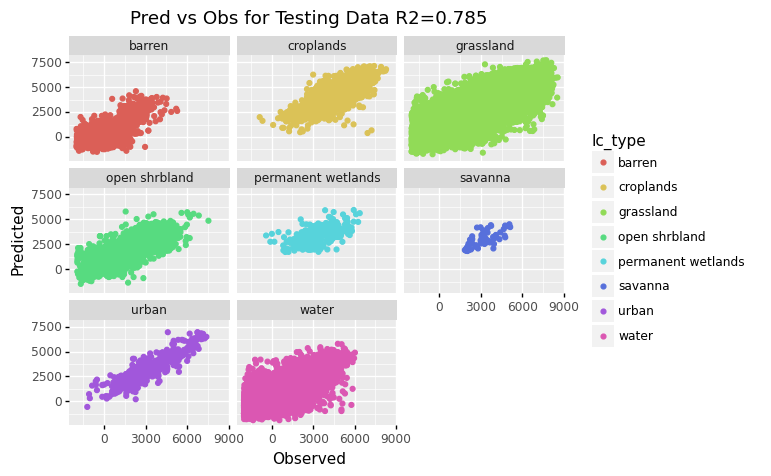

<ggplot: (2984815187309)>

In [27]:
(
    ggplot(df2_clean)  # What data to use
    + aes(x="observations", y="prediction", color="lc_type")  # What variable to use
    + geom_point()  # Geometric object to use for drawing
    + xlab("Observed") + ylab("Predicted") + labs(title=f"Pred vs Obs for Testing Data R2={r2}")
    + facet_wrap(['lc_type'])
)